# Crop Recommendation System

Goal 🎯: To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation.

In [117]:
# Import libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

### Part A: Data Exploration

In [118]:
# Create dataframe for the crop reccomendation dataset
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [119]:
# Get overview information on the crop dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [120]:
# List the crop names for the recommendation system
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [121]:
df = df[df['label'].isin(['rice', 'maize', 'chickpea', 'kidneybeans', 'mungbean', 'lentil', 'banana', 'mango', 'grapes', 'orange', 'cotton', 'coffee'])]
df ['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'mungbean', 'lentil',
       'banana', 'mango', 'grapes', 'orange', 'cotton', 'coffee'],
      dtype=object)

In [149]:
data = df.copy()
data.drop(['rainfall'], axis=1, inplace=True)

In [156]:
ideal_ranges = data.groupby('label').agg({
    'N': lambda x: f"{round(x.min())} - {round(x.max())}",
    'P': lambda x: f"{round(x.min())} - {round(x.max())}",
    'K': lambda x: f"{round(x.min())} - {round(x.max())}",
    'temperature': lambda x: f"{round(x.min())} - {round(x.max())}",
    'humidity': lambda x: f"{round(x.min())} - {round(x.max())}",
    'ph': lambda x: f"{round(x.min())} - {round(x.max())}"
}).reset_index()


ideal_ranges

,label,N,P,K,temperature,humidity,ph
0,banana,80 - 120,70 - 95,45 - 55,25 - 30,75 - 85,6 - 6
1,chickpea,20 - 60,55 - 80,75 - 85,17 - 21,14 - 20,6 - 9
2,coffee,80 - 120,15 - 40,25 - 35,23 - 28,50 - 70,6 - 7
3,cotton,100 - 140,35 - 60,15 - 25,22 - 26,75 - 85,6 - 8
4,grapes,0 - 40,120 - 145,195 - 205,9 - 42,80 - 84,6 - 6
5,kidneybeans,0 - 40,55 - 80,15 - 25,15 - 25,18 - 25,6 - 6
6,lentil,0 - 40,55 - 80,15 - 25,18 - 30,60 - 70,6 - 8
7,maize,60 - 100,35 - 60,15 - 25,18 - 27,55 - 75,6 - 7
8,mango,0 - 40,15 - 40,25 - 35,27 - 36,45 - 55,5 - 7
9,mungbean,0 - 40,35 - 60,15 - 25,27 - 30,80 - 90,6 - 7


<Axes: >

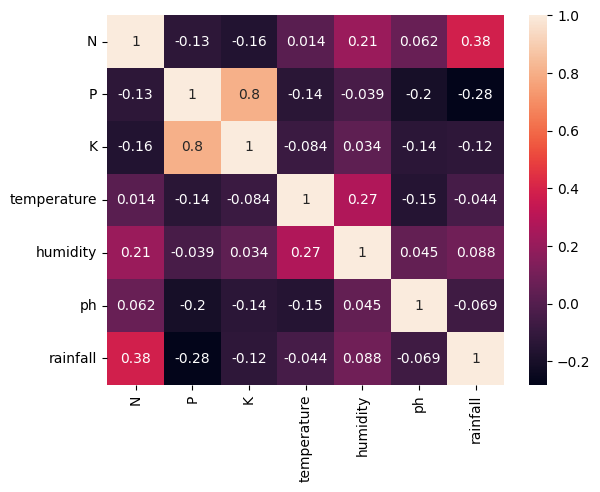

In [122]:
# Visualise correlation matrix to inspect how numeric features in the dataset are correlated to each other
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

### Part B: Data Pre-processing for Machine Learning

In [123]:
# Seperating features and target label 
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [124]:
# Initializing empty lists to append all model's name and corresponding accuracy scores
model = []
acc = []

In [125]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Part C: Building and Evaluating Machine Learning Models

##### 1) Descision Tree 🌳

In [126]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

# Fit the model on the training data
DecisionTree.fit(Xtrain,Ytrain)

# Predict on the test data
predicted_values = DecisionTree.predict(Xtest)

# Calculate the accuracy of the model
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

# Print a detailed classification report
print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        19

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



Cross Validation : Used to get a better understanding of how your model is likely to perform on new, unseen data and ensure that your performance estimates are more reliable. 

In [127]:
""" Cross-validation """
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.99166667, 0.99166667, 0.99166667, 1.        , 0.99583333])

In [128]:
# Saving the trained Decision Tree model
import pickle

# Open the file to save the Decision Tree Model as pkl file
DT_Model_pkl = open('DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)

# Close the pickle instances
DT_Model_pkl.close()

##### 2) Guassian Naive Bayes 🎲

In [129]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        19

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [130]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 0.99583333, 1.        , 1.        , 1.        ])

In [131]:
# Saving the trained Guassian Naive Bayes model
NB_Model_pkl = open('NBClassifier.pkl', 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

##### 3) Support Vector Machine 🏹

In [132]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.15416666666666667
              precision    recall  f1-score   support

      banana       1.00      0.15      0.26        20
    chickpea       1.00      0.09      0.17        22
      coffee       1.00      0.19      0.32        16
      cotton       1.00      0.14      0.25        21
      grapes       1.00      0.31      0.48        16
 kidneybeans       1.00      0.05      0.10        20
      lentil       0.00      0.00      0.00        21
       maize       0.07      1.00      0.14        16
       mango       1.00      0.10      0.18        20
    mungbean       1.00      0.04      0.07        28
      orange       1.00      0.05      0.09        21
        rice       0.00      0.00      0.00        19

    accuracy                           0.15       240
   macro avg       0.76      0.18      0.17       240
weighted avg       0.77      0.15      0.16       240



In [133]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.275     , 0.325     , 0.3875    , 0.28333333, 0.35833333])

In [134]:
# Saving the trained Support Vector Machine model
SVM_Model_pkl = open('SupportVectorMachine', 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

##### 4) Logistics Regression 👨🏻‍💻

In [135]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9916666666666667
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        16
      cotton       1.00      0.90      0.95        21
      grapes       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        21
       maize       0.89      1.00      0.94        16
       mango       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        19

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



In [136]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1.        , 0.98333333, 0.9875    , 0.9875    , 0.97916667])

In [137]:
# Saving the trained Logistic Regression model
LR_Model_pkl = open('LogisticRegression.pkl', 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

##### 5) Random Forest 🌲

In [138]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        19

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [139]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [140]:
# Saving the trained Random Forest model
RF_Model_pkl = open('RandomForest.pkl', 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

##### 6) XGBoost 🚀

In [141]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

XB = xgb.XGBClassifier()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels to numeric values
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

predicted_values_encoded = XB.predict(Xtest)

# Convert predictions back to original labels
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

x = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

XGBoost's Accuracy is:  0.9958333333333333
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
    chickpea       1.00      0.95      0.98        22
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        16
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        19

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [142]:
# Cross validation score (XGBoost)
# Fit and transform the target labels to numeric values
target_encoded = label_encoder.fit_transform(target)
score = cross_val_score(XB,features,target_encoded,cv=5)
score

array([1.        , 0.99166667, 1.        , 0.9875    , 0.99583333])

In [143]:
# Saving the trained XGBoost model
XB_Model_pkl = open('XGBoost.pkl', 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

### Part D: Accuracy Comparison between Machine learning models

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

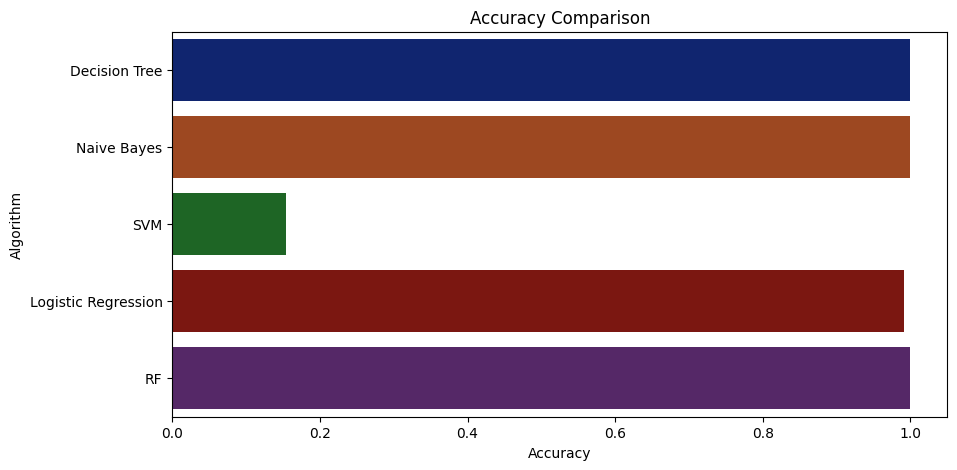

In [144]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [145]:
# List the accuracy score for each model
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 0.15416666666666667
Logistic Regression --> 0.9916666666666667
RF --> 1.0


### PART E: Making a Prediction

In [146]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [147]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
